In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## SVM  (西瓜书)

### 原始问题

$$ \max_{\mathbf{w}, b} \frac{1}{\|\mathbf{w} \|} $$
st.
$$ y_i(\mathbf{w}x_i + b) \geq 1 \quad \text{for all $i$}$$

> 貌似最大化与 b 无关，但实际上通过约束条件起作用。若w的scale过小，则约束条件不满足

### 拉格朗日对偶问题

$$ \max L(\alpha, \mathbf{w}, b) = \frac{1}{2} \|w\| ^2 + \sum_i \alpha_i(1 - y_i(\mathbf{w x_i} + b)) $$

对 $L$ 求关于 $w, b$ 的导数，令其等于0

$$ \frac{\partial L}{\partial \mathbf{w}} = ... = 0, \quad \frac{\partial L}{\partial b} = ... = 0$$
 
带入回L，经过一通不太复杂的计算，得到原问题的对偶问题：

$$ \max_\alpha L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{x_i^T x_z}$$
st. 
$$\sum_i y_i \alpha_i = 0$$
$$ \alpha_i > 0 $$

### 核函数

映射 $\phi(\cdot)$ 将原始输入映射到高维甚至无穷维特征空间，因此原优化问题变为

$$ \max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{\phi(x_i)^T \phi(x_z)} $$

但是求 $\phi(\cdot)$ 的具体形式是很难的（一是很难求出$\phi$的具体形式，二是映射后的维度非常高甚至是无穷维，计算量太大），于是引入**核函数**的概念

$$ \kappa(x, z) = \phi(x) \cdot \phi(x) $$

> 核技巧的想法是，只定义核函数K, 而不显示定义映射函数$\phi$

什么样的函数能做核函数呢？半正定

### 软间隔

不要求所有的样本都满足 $y_i(w x_i + b) > 1$, 对不满足的样本，施加**合页（hinge）损失函数**惩罚

$$ \min_w \frac{1}{2} \|w\|^2 + C \sum_i max[0, 1 - y_i(w x_i + b)]$$

引入**松弛变量（slack var）** 上式可改写为

$$ \min_w \frac{1}{2} \|w\|^2 + C \sum_i \xi_i $$
$$ y_i(w x_i + b) >= 1 - \xi_i $$
$$ \xi_i >= 0$$

解：拉格朗日函数 -> 对w, b求导，令等于0 -> 代回原式，化简得到原问题的对偶形式


$$ \max_\alpha L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{x_i^T x_z}$$
st. 
$$\sum_i y_i \alpha_i = 0$$
$$ 0 <= \alpha_i <= C $$

唯一的区别在于 $\alpha_i <= C$

## SVM (Ng)

### Start from Logistic ... 

Logistic Regression Cost Function:

$$ L(\theta) = \sum_i y_i (-log(h_\theta(x_i))) + (1-y_i) (- log(1 - h_\theta(x_i))) $$

where $$h_\theta(x) = Sigmoid(wx+b)$$ ie. y_score

**<u>Modifying Logistic cost funciton we got SVM cost funciton:</u>**

$$ L(\theta) = \sum_i y_i cost_1({\bf \theta^T x}) + (1 - y_i) cost_0({\bf \theta^T x})$$

### Change cost funciton to **hinge loss function**, l2 panelty and set C very large ...

logistic with penalty:

$$ L(\theta) = C \sum_i y_i cost_1(\theta^T x) + (1 - y_i) cost_0(\theta^T x) + \frac{1}{2} \|\theta\|$$ 

<u> what if is $C$ is very large ? </u>

$cost_1(..)$ and $cost_0(..)$ must be very close to zero, <u>that is, all samle i is correctly predicted</u>, and then minimize $\|\theta\|$

$$\min \frac{1}{2} \|\theta\|^2$$

$$\theta^T x >= 1 \quad \text{for all} y_i = 1$$
$$\theta^T x <= -1 \quad \text{for all} y_i = 0$$

### how it is related to "large margin", in graph

图见笔记

向量内积的几何意义：“投影”

### Kernel

"similarity"

$$ K(x, l) = Similarity(x, landmark) = \exp(\frac{\|x - l \|^2}{2\sigma^2})$$

$\sigma$ is "bandwidth"

use all sample i as landmark

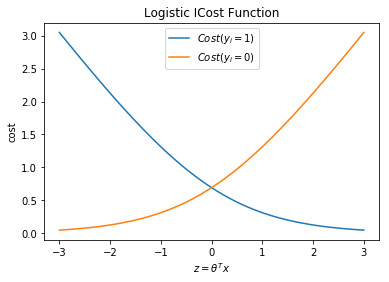

In [6]:
z = np.linspace(-3, 3, 100)  # z = theta * x

def y_score(z):
    return 1 / (1 + np.exp(-z))

cost1 = -np.log(y_score(z))
cost0 = -np.log(1 - y_score(z))

plt.plot(z, cost1, label=r'$Cost(y_i=1)$')
plt.plot(z, cost0, label=r'$Cost(y_i=0)$')
# plt.vlines([0.0, 1.0], ymin=0, ymax=5, color='grey', linestyles='dashed')
# plt.hlines([0.0], xmin=0.0, xmax=1.0, color='grey')
plt.legend()
plt.xlabel(r'$z = \theta^T x$')
plt.ylabel('cost')
plt.title('Logistic ICost Function')

plt.show()